# EBAC - Regressão II - regressão múltipla

## Tarefa I

#### Previsão de renda II

Vamos continuar trabalhando com a base 'previsao_de_renda.csv', que é a base do seu próximo projeto. Vamos usar os recursos que vimos até aqui nesta base.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

In [108]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset
import matplotlib.pyplot as plt
import numpy as np

import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import plot_tree

%matplotlib inline

In [4]:
df = pd.read_csv('previsao_de_renda.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   id_cliente             15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12427 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  renda                  15000 non-null  float64
dtypes:

In [6]:
print(df.isna().sum())

Unnamed: 0                  0
data_ref                    0
id_cliente                  0
sexo                        0
posse_de_veiculo            0
posse_de_imovel             0
qtd_filhos                  0
tipo_renda                  0
educacao                    0
estado_civil                0
tipo_residencia             0
idade                       0
tempo_emprego            2573
qt_pessoas_residencia       0
renda                       0
dtype: int64


In [7]:
df = df.dropna()
print(df.isna().sum())

Unnamed: 0               0
data_ref                 0
id_cliente               0
sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
tempo_emprego            0
qt_pessoas_residencia    0
renda                    0
dtype: int64


In [8]:
df = df.drop(columns=['Unnamed: 0', 'data_ref', 'id_cliente'])

In [9]:
df.posse_de_veiculo = [int(x) for x in df.posse_de_veiculo]
df.posse_de_imovel = [int(x) for x in df.posse_de_imovel]

1. Separe a base em treinamento e teste (25% para teste, 75% para treinamento).
2. Rode uma regularização *ridge* com alpha = [0, 0.001, 0.005, 0.01, 0.05, 0.1] e avalie o $R^2$ na base de testes. Qual o melhor modelo?
3. Faça o mesmo que no passo 2, com uma regressão *LASSO*. Qual método chega a um melhor resultado?
4. Rode um modelo *stepwise*. Avalie o $R^2$ na base de testes. Qual o melhor resultado?
5. Compare os parâmetros e avalie eventuais diferenças. Qual modelo você acha o melhor de todos?
6. Partindo dos modelos que você ajustou, tente melhorar o $R^2$ na base de testes. Use a criatividade, veja se consegue inserir alguma transformação ou combinação de variáveis.
7. Ajuste uma árvore de regressão e veja se consegue um $R^2$ melhor com ela.

### 1. Separando a base em treinamento e teste.

In [12]:
X = pd.get_dummies(df.drop(columns = 'renda'), drop_first = True)
y = df['renda']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### 2. Rodando uma regularização *ridge*.

In [14]:
modelo = 'np.log(renda) ~ C(sexo, Treatment("F")) + posse_de_veiculo + posse_de_imovel + qtd_filhos + idade + tempo_emprego'
md = smf.ols(modelo, data = df)
reg = md.fit_regularized(method = 'elastic_net'
                          , refit = True
                          , L1_wt = 0.0000001
                          , alpha = 0)

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.346
Method:                 Least Squares   F-statistic:                     940.9
Date:                Fri, 24 Jan 2025   Prob (F-statistic):               0.00
Time:                        16:39:52   Log-Likelihood:                -13673.
No. Observations:               12427   AIC:                         2.736e+04
Df Residuals:                   12420   BIC:                         2.742e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        7.2223      0.034    213.646      0.000       7.156       7.289
C(sexo, Treatment("F"))[T.M]     0.7688      0.015     52.768      0.000       0.740       0.797
posse_de_veiculo                 0.0561      0.014      3.986      0.000       0.029       0.084
posse_de_imovel                  0.0866      0.014      6.278      0.000       0.060       0.114
qtd_filhos                       0.0239      0.009      2.767      0.006       0.007       0.041
idade                            0.0049      0.001      6.399      0.000       0.003       0.006
tempo_emprego                    0.0610      0.001     59.084      0.000       0.059       0.063
==============================================================================
Omnibus:                        1.243   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.537   Jarque-Bera (JB):                1.216
Skew:                           0.022   Prob(JB):                        0.545
Kurtosis:                       3.020   Cond. No.                         223.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
modelo = 'np.log(renda) ~ C(sexo, Treatment("F")) + posse_de_veiculo + posse_de_imovel + qtd_filhos + idade + tempo_emprego'
md = smf.ols(modelo, data = df)
reg = md.fit_regularized(method = 'elastic_net'
                          , refit = True
                          , L1_wt = 0.0000001
                          , alpha = 0.001)

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.346
Method:                 Least Squares   F-statistic:                     940.9
Date:                Fri, 24 Jan 2025   Prob (F-statistic):               0.00
Time:                        16:39:52   Log-Likelihood:                -13673.
No. Observations:               12427   AIC:                         2.736e+04
Df Residuals:                   12420   BIC:                         2.742e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        7.2223      0.034    213.646      0.000       7.156       7.289
C(sexo, Treatment("F"))[T.M]     0.7688      0.015     52.768      0.000       0.740       0.797
posse_de_veiculo                 0.0561      0.014      3.986      0.000       0.029       0.084
posse_de_imovel                  0.0866      0.014      6.278      0.000       0.060       0.114
qtd_filhos                       0.0239      0.009      2.767      0.006       0.007       0.041
idade                            0.0049      0.001      6.399      0.000       0.003       0.006
tempo_emprego                    0.0610      0.001     59.084      0.000       0.059       0.063
==============================================================================
Omnibus:                        1.243   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.537   Jarque-Bera (JB):                1.216
Skew:                           0.022   Prob(JB):                        0.545
Kurtosis:                       3.020   Cond. No.                         223.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
modelo = 'np.log(renda) ~ C(sexo, Treatment("F")) + posse_de_veiculo + posse_de_imovel + qtd_filhos + idade + tempo_emprego'
md = smf.ols(modelo, data = df)
reg = md.fit_regularized(method = 'elastic_net'
                          , refit = True
                          , L1_wt = 0.0000001
                          , alpha = 0.005)

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.346
Method:                 Least Squares   F-statistic:                     940.9
Date:                Fri, 24 Jan 2025   Prob (F-statistic):               0.00
Time:                        16:39:52   Log-Likelihood:                -13673.
No. Observations:               12427   AIC:                         2.736e+04
Df Residuals:                   12420   BIC:                         2.742e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        7.2223      0.034    213.646      0.000       7.156       7.289
C(sexo, Treatment("F"))[T.M]     0.7688      0.015     52.768      0.000       0.740       0.797
posse_de_veiculo                 0.0561      0.014      3.986      0.000       0.029       0.084
posse_de_imovel                  0.0866      0.014      6.278      0.000       0.060       0.114
qtd_filhos                       0.0239      0.009      2.767      0.006       0.007       0.041
idade                            0.0049      0.001      6.399      0.000       0.003       0.006
tempo_emprego                    0.0610      0.001     59.084      0.000       0.059       0.063
==============================================================================
Omnibus:                        1.243   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.537   Jarque-Bera (JB):                1.216
Skew:                           0.022   Prob(JB):                        0.545
Kurtosis:                       3.020   Cond. No.                         223.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
modelo = 'np.log(renda) ~ C(sexo, Treatment("F")) + posse_de_veiculo + posse_de_imovel + qtd_filhos + idade + tempo_emprego'
md = smf.ols(modelo, data = df)
reg = md.fit_regularized(method = 'elastic_net'
                          , refit = True
                          , L1_wt = 0.0000001
                          , alpha = 0.01)

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.346
Method:                 Least Squares   F-statistic:                     940.9
Date:                Fri, 24 Jan 2025   Prob (F-statistic):               0.00
Time:                        16:39:53   Log-Likelihood:                -13673.
No. Observations:               12427   AIC:                         2.736e+04
Df Residuals:                   12420   BIC:                         2.742e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        7.2223      0.034    213.646      0.000       7.156       7.289
C(sexo, Treatment("F"))[T.M]     0.7688      0.015     52.768      0.000       0.740       0.797
posse_de_veiculo                 0.0561      0.014      3.986      0.000       0.029       0.084
posse_de_imovel                  0.0866      0.014      6.278      0.000       0.060       0.114
qtd_filhos                       0.0239      0.009      2.767      0.006       0.007       0.041
idade                            0.0049      0.001      6.399      0.000       0.003       0.006
tempo_emprego                    0.0610      0.001     59.084      0.000       0.059       0.063
==============================================================================
Omnibus:                        1.243   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.537   Jarque-Bera (JB):                1.216
Skew:                           0.022   Prob(JB):                        0.545
Kurtosis:                       3.020   Cond. No.                         223.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
modelo = 'np.log(renda) ~ C(sexo, Treatment("F")) + posse_de_veiculo + posse_de_imovel + qtd_filhos + idade + tempo_emprego'
md = smf.ols(modelo, data = df)
reg = md.fit_regularized(method = 'elastic_net'
                          , refit = True
                          , L1_wt = 0.0000001
                          , alpha = 0.05)

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.346
Method:                 Least Squares   F-statistic:                     940.9
Date:                Fri, 24 Jan 2025   Prob (F-statistic):               0.00
Time:                        16:39:53   Log-Likelihood:                -13673.
No. Observations:               12427   AIC:                         2.736e+04
Df Residuals:                   12420   BIC:                         2.742e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        7.2223      0.034    213.646      0.000       7.156       7.289
C(sexo, Treatment("F"))[T.M]     0.7688      0.015     52.768      0.000       0.740       0.797
posse_de_veiculo                 0.0561      0.014      3.986      0.000       0.029       0.084
posse_de_imovel                  0.0866      0.014      6.278      0.000       0.060       0.114
qtd_filhos                       0.0239      0.009      2.767      0.006       0.007       0.041
idade                            0.0049      0.001      6.399      0.000       0.003       0.006
tempo_emprego                    0.0610      0.001     59.084      0.000       0.059       0.063
==============================================================================
Omnibus:                        1.243   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.537   Jarque-Bera (JB):                1.216
Skew:                           0.022   Prob(JB):                        0.545
Kurtosis:                       3.020   Cond. No.                         223.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
modelo = 'np.log(renda) ~ C(sexo, Treatment("F")) + posse_de_veiculo + posse_de_imovel + qtd_filhos + idade + tempo_emprego'
md = smf.ols(modelo, data = df)
reg = md.fit_regularized(method = 'elastic_net'
                          , refit = True
                          , L1_wt = 0.0000001
                          , alpha = 0.1)

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.346
Method:                 Least Squares   F-statistic:                     940.9
Date:                Fri, 24 Jan 2025   Prob (F-statistic):               0.00
Time:                        16:39:53   Log-Likelihood:                -13673.
No. Observations:               12427   AIC:                         2.736e+04
Df Residuals:                   12420   BIC:                         2.742e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        7.2223      0.034    213.646      0.000       7.156       7.289
C(sexo, Treatment("F"))[T.M]     0.7688      0.015     52.768      0.000       0.740       0.797
posse_de_veiculo                 0.0561      0.014      3.986      0.000       0.029       0.084
posse_de_imovel                  0.0866      0.014      6.278      0.000       0.060       0.114
qtd_filhos                       0.0239      0.009      2.767      0.006       0.007       0.041
idade                            0.0049      0.001      6.399      0.000       0.003       0.006
tempo_emprego                    0.0610      0.001     59.084      0.000       0.059       0.063
==============================================================================
Omnibus:                        1.243   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.537   Jarque-Bera (JB):                1.216
Skew:                           0.022   Prob(JB):                        0.545
Kurtosis:                       3.020   Cond. No.                         223.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Quando olhamos os modelos regularizados utilizando o método ridge, temos os valores de r-quadrado
 iguais para todos os alphas

### 3. Rodando uma regularização *LASSO*.

In [22]:
modelo = 'np.log(renda) ~ C(sexo, Treatment("F")) + posse_de_veiculo + posse_de_imovel + qtd_filhos + idade + tempo_emprego'
md = smf.ols(modelo, data = df)
reg = md.fit_regularized(method = 'elastic_net'
                          , refit = True
                          , L1_wt = 1
                          , alpha = 0)

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.346
Method:                 Least Squares   F-statistic:                     940.9
Date:                Fri, 24 Jan 2025   Prob (F-statistic):               0.00
Time:                        16:39:53   Log-Likelihood:                -13673.
No. Observations:               12427   AIC:                         2.736e+04
Df Residuals:                   12420   BIC:                         2.742e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        7.2223      0.034    213.646      0.000       7.156       7.289
C(sexo, Treatment("F"))[T.M]     0.7688      0.015     52.768      0.000       0.740       0.797
posse_de_veiculo                 0.0561      0.014      3.986      0.000       0.029       0.084
posse_de_imovel                  0.0866      0.014      6.278      0.000       0.060       0.114
qtd_filhos                       0.0239      0.009      2.767      0.006       0.007       0.041
idade                            0.0049      0.001      6.399      0.000       0.003       0.006
tempo_emprego                    0.0610      0.001     59.084      0.000       0.059       0.063
==============================================================================
Omnibus:                        1.243   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.537   Jarque-Bera (JB):                1.216
Skew:                           0.022   Prob(JB):                        0.545
Kurtosis:                       3.020   Cond. No.                         223.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
modelo = 'np.log(renda) ~ C(sexo, Treatment("F")) + posse_de_veiculo + posse_de_imovel + qtd_filhos + idade + tempo_emprego'
md = smf.ols(modelo, data = df)
reg = md.fit_regularized(method = 'elastic_net'
                          , refit = True
                          , L1_wt = 1
                          , alpha = 0.001)

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.344
Method:                 Least Squares   F-statistic:                     1303.
Date:                Fri, 24 Jan 2025   Prob (F-statistic):               0.00
Time:                        16:39:53   Log-Likelihood:                -13697.
No. Observations:               12427   AIC:                         2.741e+04
Df Residuals:                   12422   BIC:                         2.745e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        7.2956      0.031    234.678      0.000       7.235       7.357
C(sexo, Treatment("F"))[T.M]     0.7664      0.015     52.560      0.000       0.738       0.795
posse_de_veiculo                 0.0608      0.014      4.318      0.000       0.033       0.088
posse_de_imovel                       0          0        nan        nan           0           0
qtd_filhos                            0          0        nan        nan           0           0
idade                            0.0048      0.001      6.491      0.000       0.003       0.006
tempo_emprego                    0.0609      0.001     58.968      0.000       0.059       0.063
==============================================================================
Omnibus:                        0.905   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.636   Jarque-Bera (JB):                0.881
Skew:                           0.019   Prob(JB):                        0.644
Kurtosis:                       3.016   Cond. No.                         223.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
modelo = 'np.log(renda) ~ C(sexo, Treatment("F")) + posse_de_veiculo + posse_de_imovel + qtd_filhos + idade + tempo_emprego'
md = smf.ols(modelo, data = df)
reg = md.fit_regularized(method = 'elastic_net'
                          , refit = True
                          , L1_wt = 1
                          , alpha = 0.005)

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.343
Model:                            OLS   Adj. R-squared:                  0.343
Method:                 Least Squares   F-statistic:                     1621.
Date:                Fri, 24 Jan 2025   Prob (F-statistic):               0.00
Time:                        16:39:53   Log-Likelihood:                -13706.
No. Observations:               12427   AIC:                         2.742e+04
Df Residuals:                   12423   BIC:                         2.746e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        7.3217      0.031    239.950      0.000       7.262       7.382
C(sexo, Treatment("F"))[T.M]     0.7868      0.014     57.013      0.000       0.760       0.814
posse_de_veiculo                      0          0        nan        nan           0           0
posse_de_imovel                       0          0        nan        nan           0           0
qtd_filhos                            0          0        nan        nan           0           0
idade                            0.0046      0.001      6.253      0.000       0.003       0.006
tempo_emprego                    0.0609      0.001     58.869      0.000       0.059       0.063
==============================================================================
Omnibus:                        0.842   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.657   Jarque-Bera (JB):                0.826
Skew:                           0.019   Prob(JB):                        0.662
Kurtosis:                       3.009   Cond. No.                         223.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
modelo = 'np.log(renda) ~ C(sexo, Treatment("F")) + posse_de_veiculo + posse_de_imovel + qtd_filhos + idade + tempo_emprego'
md = smf.ols(modelo, data = df)
reg = md.fit_regularized(method = 'elastic_net'
                          , refit = True
                          , L1_wt = 1
                          , alpha = 0.01)

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.345
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     1310.
Date:                Fri, 24 Jan 2025   Prob (F-statistic):               0.00
Time:                        16:39:53   Log-Likelihood:                -13685.
No. Observations:               12427   AIC:                         2.738e+04
Df Residuals:                   12422   BIC:                         2.743e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        7.2790      0.031    233.591      0.000       7.218       7.340
C(sexo, Treatment("F"))[T.M]     0.7895      0.014     57.276      0.000       0.762       0.817
posse_de_veiculo                      0          0        nan        nan           0           0
posse_de_imovel                  0.0898      0.014      6.512      0.000       0.063       0.117
qtd_filhos                            0          0        nan        nan           0           0
idade                            0.0042      0.001      5.635      0.000       0.003       0.006
tempo_emprego                    0.0610      0.001     59.110      0.000       0.059       0.063
==============================================================================
Omnibus:                        1.194   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.551   Jarque-Bera (JB):                1.174
Skew:                           0.023   Prob(JB):                        0.556
Kurtosis:                       3.012   Cond. No.                         223.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
modelo = 'np.log(renda) ~ C(sexo, Treatment("F")) + posse_de_veiculo + posse_de_imovel + qtd_filhos + idade + tempo_emprego'
md = smf.ols(modelo, data = df)
reg = md.fit_regularized(method = 'elastic_net'
                          , refit = True
                          , L1_wt = 1
                          , alpha = 0.05)

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.343
Model:                            OLS   Adj. R-squared:                  0.343
Method:                 Least Squares   F-statistic:                     1621.
Date:                Fri, 24 Jan 2025   Prob (F-statistic):               0.00
Time:                        16:39:54   Log-Likelihood:                -13706.
No. Observations:               12427   AIC:                         2.742e+04
Df Residuals:                   12423   BIC:                         2.746e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        7.3217      0.031    239.950      0.000       7.262       7.382
C(sexo, Treatment("F"))[T.M]     0.7868      0.014     57.013      0.000       0.760       0.814
posse_de_veiculo                      0          0        nan        nan           0           0
posse_de_imovel                       0          0        nan        nan           0           0
qtd_filhos                            0          0        nan        nan           0           0
idade                            0.0046      0.001      6.253      0.000       0.003       0.006
tempo_emprego                    0.0609      0.001     58.869      0.000       0.059       0.063
==============================================================================
Omnibus:                        0.842   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.657   Jarque-Bera (JB):                0.826
Skew:                           0.019   Prob(JB):                        0.662
Kurtosis:                       3.009   Cond. No.                         223.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
modelo = 'np.log(renda) ~ C(sexo, Treatment("F")) + posse_de_veiculo + posse_de_imovel + qtd_filhos + idade + tempo_emprego'
md = smf.ols(modelo, data = df)
reg = md.fit_regularized(method = 'elastic_net'
                          , refit = True
                          , L1_wt = 1
                          , alpha = 0.1)

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.343
Model:                            OLS   Adj. R-squared:                  0.343
Method:                 Least Squares   F-statistic:                     1621.
Date:                Fri, 24 Jan 2025   Prob (F-statistic):               0.00
Time:                        16:39:54   Log-Likelihood:                -13706.
No. Observations:               12427   AIC:                         2.742e+04
Df Residuals:                   12423   BIC:                         2.746e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        7.3217      0.031    239.950      0.000       7.262       7.382
C(sexo, Treatment("F"))[T.M]     0.7868      0.014     57.013      0.000       0.760       0.814
posse_de_veiculo                      0          0        nan        nan           0           0
posse_de_imovel                       0          0        nan        nan           0           0
qtd_filhos                            0          0        nan        nan           0           0
idade                            0.0046      0.001      6.253      0.000       0.003       0.006
tempo_emprego                    0.0609      0.001     58.869      0.000       0.059       0.063
==============================================================================
Omnibus:                        0.842   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.657   Jarque-Bera (JB):                0.826
Skew:                           0.019   Prob(JB):                        0.662
Kurtosis:                       3.009   Cond. No.                         223.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

O melhor modelo foi o com o alpha = 0. Obtendo um r-quadrado maior.

### 4. Rodando um modelo *stepwise*.

In [30]:
print(X.dtypes)
print(y.dtypes)
X.head(2)

posse_de_veiculo                   int64
posse_de_imovel                    int64
qtd_filhos                         int64
idade                              int64
tempo_emprego                    float64
qt_pessoas_residencia            float64
sexo_M                              bool
tipo_renda_Bolsista                 bool
tipo_renda_Empresário               bool
tipo_renda_Pensionista              bool
tipo_renda_Servidor público         bool
educacao_Pós graduação              bool
educacao_Secundário                 bool
educacao_Superior completo          bool
educacao_Superior incompleto        bool
estado_civil_Separado               bool
estado_civil_Solteiro               bool
estado_civil_União                  bool
estado_civil_Viúvo                  bool
tipo_residencia_Casa                bool
tipo_residencia_Com os pais         bool
tipo_residencia_Comunitário         bool
tipo_residencia_Estúdio             bool
tipo_residencia_Governamental       bool
dtype: object
fl

,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,sexo_M,tipo_renda_Bolsista,tipo_renda_Empresário,tipo_renda_Pensionista,...,educacao_Superior incompleto,estado_civil_Separado,estado_civil_Solteiro,estado_civil_União,estado_civil_Viúvo,tipo_residencia_Casa,tipo_residencia_Com os pais,tipo_residencia_Comunitário,tipo_residencia_Estúdio,tipo_residencia_Governamental
0,0,1,0,26,6.602740,1.0,False,False,True,False,...,False,False,True,False,False,True,False,False,False,False
1,1,1,0,28,7.183562,2.0,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [31]:
X = X.astype(float)
y = y.astype(float)

In [32]:
print(X.dtypes)
print(y.dtypes)

posse_de_veiculo                 float64
posse_de_imovel                  float64
qtd_filhos                       float64
idade                            float64
tempo_emprego                    float64
qt_pessoas_residencia            float64
sexo_M                           float64
tipo_renda_Bolsista              float64
tipo_renda_Empresário            float64
tipo_renda_Pensionista           float64
tipo_renda_Servidor público      float64
educacao_Pós graduação           float64
educacao_Secundário              float64
educacao_Superior completo       float64
educacao_Superior incompleto     float64
estado_civil_Separado            float64
estado_civil_Solteiro            float64
estado_civil_União               float64
estado_civil_Viúvo               float64
tipo_residencia_Casa             float64
tipo_residencia_Com os pais      float64
tipo_residencia_Comunitário      float64
tipo_residencia_Estúdio          float64
tipo_residencia_Governamental    float64
dtype: object
fl

In [33]:
X.head()

,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,sexo_M,tipo_renda_Bolsista,tipo_renda_Empresário,tipo_renda_Pensionista,...,educacao_Superior incompleto,estado_civil_Separado,estado_civil_Solteiro,estado_civil_União,estado_civil_Viúvo,tipo_residencia_Casa,tipo_residencia_Com os pais,tipo_residencia_Comunitário,tipo_residencia_Estúdio,tipo_residencia_Governamental
0,0.0,1.0,0.0,26.0,6.602740,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,1.0,0.0,28.0,7.183562,2.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,1.0,0.0,35.0,0.838356,2.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,1.0,1.0,30.0,4.846575,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,33.0,4.293151,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [35]:
def stepwise_selection(X, y,
                       initial_list=[],
                       threshold_in=0.05,
                       threshold_out = 0.05,
                       verbose=True):
    """ Perform a forward-backward feature selection
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded, dtype=np.dtype('float64'))
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.index[new_pval.argmin()]
            included.append(best_feature)
            changed=True
            if verbose:
                 print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        print("#############")
        print(included)
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

variaveis = stepwise_selection(X_train, y_train)

print(variaveis)

Add  tempo_emprego                  with p-value 0.0
#############
['tempo_emprego']
Add  sexo_M                         with p-value 1.26513e-242
#############
['tempo_emprego', 'sexo_M']
Add  tipo_renda_Empresário          with p-value 4.12304e-06
#############
['tempo_emprego', 'sexo_M', 'tipo_renda_Empresário']
Add  idade                          with p-value 2.37794e-05
#############
['tempo_emprego', 'sexo_M', 'tipo_renda_Empresário', 'idade']
Add  educacao_Superior completo     with p-value 0.00080423
#############
['tempo_emprego', 'sexo_M', 'tipo_renda_Empresário', 'idade', 'educacao_Superior completo']
Add  posse_de_imovel                with p-value 0.043736
#############
['tempo_emprego', 'sexo_M', 'tipo_renda_Empresário', 'idade', 'educacao_Superior completo', 'posse_de_imovel']
#############
['tempo_emprego', 'sexo_M', 'tipo_renda_Empresário', 'idade', 'educacao_Superior completo', 'posse_de_imovel']
['tempo_emprego', 'sexo_M', 'tipo_renda_Empresário', 'idade', 'educacao_

In [65]:
df.head()

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,F,0,1,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,M,1,1,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,F,1,1,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,F,0,1,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,M,1,0,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97


In [70]:
df = pd.get_dummies(df, drop_first=True)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12427 entries, 0 to 14999
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   posse_de_veiculo               12427 non-null  int64  
 1   posse_de_imovel                12427 non-null  int64  
 2   qtd_filhos                     12427 non-null  int64  
 3   idade                          12427 non-null  int64  
 4   tempo_emprego                  12427 non-null  float64
 5   qt_pessoas_residencia          12427 non-null  float64
 6   renda                          12427 non-null  float64
 7   sexo_M                         12427 non-null  bool   
 8   tipo_renda_Bolsista            12427 non-null  bool   
 9   tipo_renda_Empresário          12427 non-null  bool   
 10  tipo_renda_Pensionista         12427 non-null  bool   
 11  tipo_renda_Servidor público    12427 non-null  bool   
 12  educacao_Pós graduação         12427 non-null  bool

In [78]:
df = df.astype(float)

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12427 entries, 0 to 14999
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   posse_de_veiculo               12427 non-null  float64
 1   posse_de_imovel                12427 non-null  float64
 2   qtd_filhos                     12427 non-null  float64
 3   idade                          12427 non-null  float64
 4   tempo_emprego                  12427 non-null  float64
 5   qt_pessoas_residencia          12427 non-null  float64
 6   renda                          12427 non-null  float64
 7   sexo_M                         12427 non-null  float64
 8   tipo_renda_Bolsista            12427 non-null  float64
 9   tipo_renda_Empresário          12427 non-null  float64
 10  tipo_renda_Pensionista         12427 non-null  float64
 11  tipo_renda_Servidor público    12427 non-null  float64
 12  educacao_Pós graduação         12427 non-null  floa

In [84]:
novos_nomes = { 'tipo_renda_Servidor público' : 'tipo_renda_Servidor_público',
                'educacao_Pós graduação': 'educacao_Pós_graduação',
                'educacao_Superior completo' : 'educacao_Superior_completo',
                'educacao_Superior incompleto' : 'educacao_Superior_incompleto',
                'tipo_residencia_Com os pais' : 'tipo_residencia_com_pais'}
df = df.rename(columns= novos_nomes)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12427 entries, 0 to 14999
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   posse_de_veiculo               12427 non-null  float64
 1   posse_de_imovel                12427 non-null  float64
 2   qtd_filhos                     12427 non-null  float64
 3   idade                          12427 non-null  float64
 4   tempo_emprego                  12427 non-null  float64
 5   qt_pessoas_residencia          12427 non-null  float64
 6   renda                          12427 non-null  float64
 7   sexo_M                         12427 non-null  float64
 8   tipo_renda_Bolsista            12427 non-null  float64
 9   tipo_renda_Empresário          12427 non-null  float64
 10  tipo_renda_Pensionista         12427 non-null  float64
 11  tipo_renda_Servidor_público    12427 non-null  float64
 12  educacao_Pós_graduação         12427 non-null  floa

In [86]:
reg = smf.ols('renda ~ tempo_emprego + sexo_M + tipo_renda_Empresário + idade + educacao_Superior_completo + posse_de_imovel', data = df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.255
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     709.2
Date:                Fri, 24 Jan 2025   Prob (F-statistic):               0.00
Time:                        17:03:16   Log-Likelihood:            -1.2880e+05
No. Observations:               12427   AIC:                         2.576e+05
Df Residuals:                   12420   BIC:                         2.577e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                  -2819.4175    343.638     -8.205      0.000   -3493.001   -2145.834
tempo_emprego                555.2124     10.939     50.755      0.000     533.770     576.655
sexo_M                      6113.6329    145.629     41.981      0.000    5828.177    6399.089
tipo_renda_Empresário        776.9586    154.396      5.032      0.000     474.319    1079.598
idade                         42.0718      7.861      5.352      0.000      26.664      57.480
educacao_Superior_completo   659.4927    143.053      4.610      0.000     379.086     939.900
posse_de_imovel              370.3710    145.425      2.547      0.011      85.316     655.426
==============================================================================
Omnibus:                    17571.971   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          9898889.983
Skew:                           8.127   Prob(JB):                         0.00
Kurtosis:                     140.307   Cond. No.                         217.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

O r-quadrado encontrado foi menor do que os dos outros modelos feitos.

### 5. Tanto a regularização ridge como a regularização LASSO (com alpha = 0) obteram o mesmo r-quadrado.

### 6. Tentando melhorar o r-quadrado

In [92]:
reg = smf.ols('np.log(renda) ~ tempo_emprego + sexo_M + tipo_renda_Empresário + idade + educacao_Superior_completo + posse_de_imovel', data = df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.355
Model:                            OLS   Adj. R-squared:                  0.354
Method:                 Least Squares   F-statistic:                     1138.
Date:                Fri, 24 Jan 2025   Prob (F-statistic):               0.00
Time:                        17:15:54   Log-Likelihood:                -13594.
No. Observations:               12427   AIC:                         2.720e+04
Df Residuals:                   12420   BIC:                         2.725e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      7.1533      0.032    221.048      0.000       7.090       7.217
tempo_emprego                  0.0619      0.001     60.085      0.000       0.060       0.064
sexo_M                         0.8017      0.014     58.461      0.000       0.775       0.829
tipo_renda_Empresário          0.1427      0.015      9.816      0.000       0.114       0.171
idade                          0.0050      0.001      6.740      0.000       0.004       0.006
educacao_Superior_completo     0.1169      0.013      8.677      0.000       0.090       0.143
posse_de_imovel                0.0854      0.014      6.238      0.000       0.059       0.112
==============================================================================
Omnibus:                        0.787   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.675   Jarque-Bera (JB):                0.769
Skew:                           0.018   Prob(JB):                        0.681
Kurtosis:                       3.012   Cond. No.                         217.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Utilizando o log na renda, podemos obter um valor de r-quadrado superior ao modelo anterior.

### 7. Ajustando uma árvore de regressão 

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [153]:
arvore = DecisionTreeRegressor(max_depth=2)

arvore.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2)

In [155]:
mse = mean_squared_error(y_test, arvore.predict(X_test))
r2 = r2_score(y_test, previsoes)
print(mse)
print(r2)

42449985.689593375
0.2349877747593554


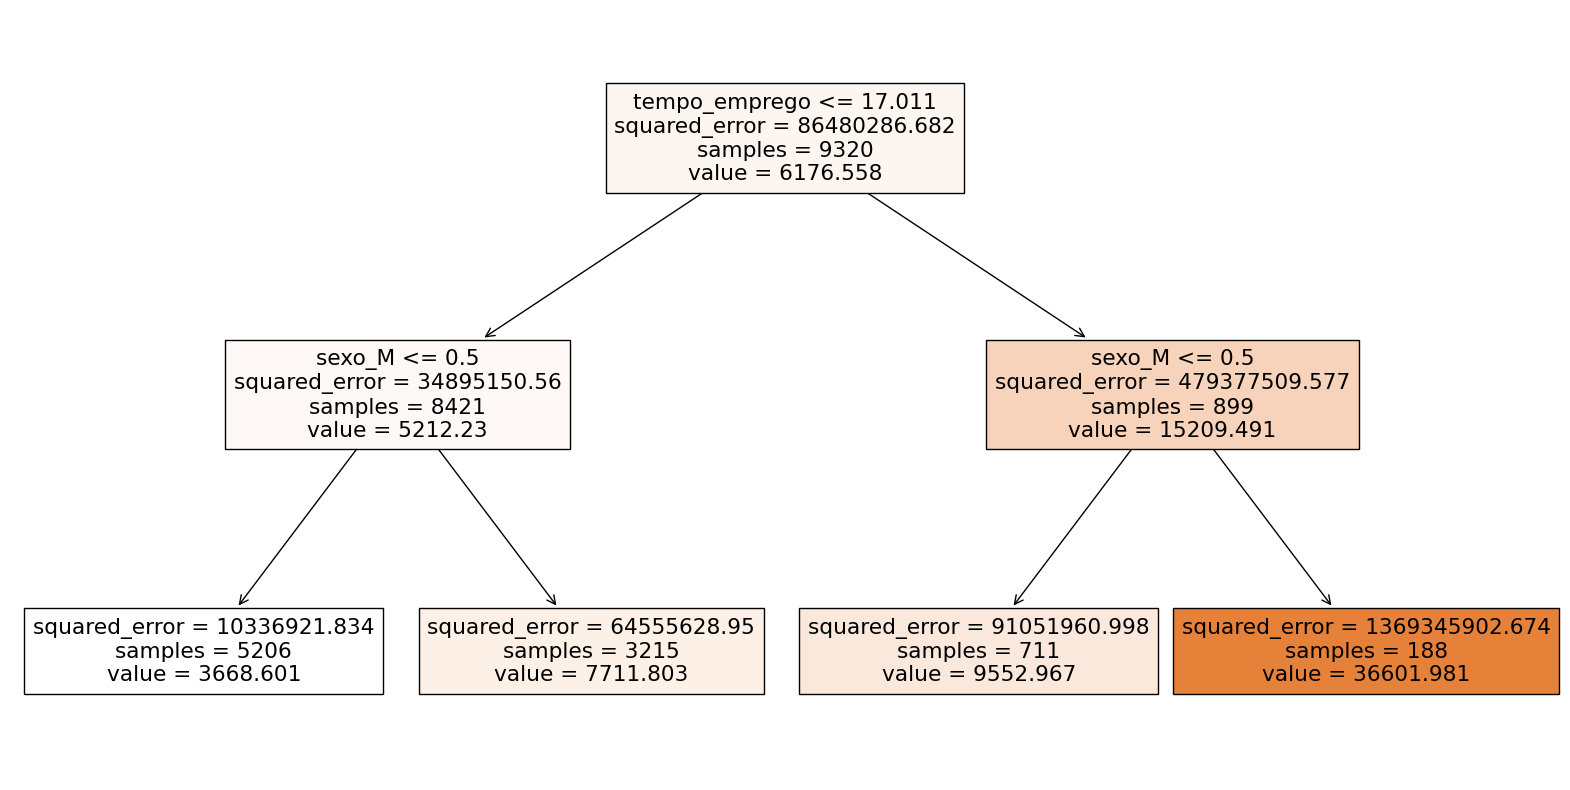

In [157]:
plt.rc('figure', figsize=(20, 10))
tp = tree.plot_tree(arvore,
                    feature_names=X.columns,
                    filled=True)

O r-quadrado encontrado na árvore foi menor do que o dos outros modelos.